In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
import sklearn.neighbors
from sklearn import metrics
from sklearn.preprocessing import scale
from collections import Counter
import statistics
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
df = pd.read_csv('heart.csv')
df.head()
df.fillna(0)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df['Sex'].replace( { 'M':1, 'F':0} , inplace=True)
df['ChestPainType'].replace( { 'ATA':1, 'NAP':2, 'ASY':3, 'TA':4} , inplace=True)
df['FastingBS'].replace( { 0 : 0, 1 : 1} , inplace=True)
df['RestingECG'].replace( { 'Normal':0, 'ST':1, 'LVH':2} , inplace=True)
df['ExerciseAngina'].replace( { 'N':0, 'Y':1} , inplace=True)
df['ST_Slope'].replace( { 'Up':0, 'Flat':1, 'Down':2} , inplace=True)
df['HeartDisease'].replace( { 1 : 1, 0 : 0} , inplace=True)

In [4]:
continuous_features  = ['Age', 'ChestPainType','RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_features = ['Sex ', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope ']

df[continuous_features] = df[continuous_features].apply(lambda x1: (x1 - np.min(x1))/(np.max(x1)-np.min(x1)))
df
   

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1,0.000000,0.70,0.479270,0,0,0.788732,0,0.295455,0,0
1,0.428571,0,0.333333,0.80,0.298507,0,0,0.676056,0,0.409091,1,1
2,0.183673,1,0.000000,0.65,0.469320,0,1,0.267606,0,0.295455,0,0
3,0.408163,0,0.666667,0.69,0.354892,0,0,0.338028,1,0.465909,1,1
4,0.530612,1,0.333333,0.75,0.323383,0,0,0.436620,0,0.295455,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1,1.000000,0.55,0.437811,0,0,0.507042,0,0.431818,1,1
914,0.816327,1,0.666667,0.72,0.320066,1,0,0.570423,0,0.681818,1,1
915,0.591837,1,0.666667,0.65,0.217247,0,0,0.387324,1,0.431818,1,1
916,0.591837,0,0.000000,0.65,0.391376,0,2,0.802817,0,0.295455,1,1


In [5]:
#separating the dataset into 80% training and 20% testing

df_X=df.iloc[:,:11]
df_Y=df.iloc[:,-1]
X_train,X_test,Y_train,Y_test=train_test_split(df_X,df_Y,test_size=0.2,random_state=None)
X_train.index=range(len(X_train))
Y_train.index=range(len(X_train))
X_test.index=range(len(X_test))
Y_test.index=range(len(Y_test))

In [6]:

def neighbour_distance(X_train,Y_train,X_test,K):
    distance=[]
    for i in range(len(X_train)):
        eDistance=0
        for j in range(len(X_train.columns)):   
                eDistance+=round(np.sqrt(pow((X_train.iloc[i,j]-X_test[j]),2)),2)
        distance.append((eDistance,i,Y_train.iloc[i]))
        distance=sorted(distance, key=lambda x: x[0])[0:K]
    return distance
# Predict the output of the categorical variables based on K nearest neighbours 
# Output is the most frequent class among K nearest neighbours
def output_predict(X_train,Y_train,X_test,K):
    neighbours=[]
    responses=[]
    for i in range(len(X_test)):
        neighbours.append(neighbour_distance(X_train,Y_train,X_test.iloc[i,:],K))
              
  
   
    for i in neighbours:
        votes={}
        for j in i:
            if j[-1] in votes.keys():
                votes[j[-1]]=votes[j[-1]]+1
            else:
                votes[j[-1]]=1
               
        responses.append(sorted(votes,key=votes.get,reverse=True)[0])
    return responses

 


def getAccuracy(actual,predicted):
    correct=0
    for i in range(len(predicted)):
        if predicted[i]==actual[i]:
            correct+=1
    return round((correct/len(actual))*100,2)


In [7]:
#separting the training set into 60% training and 20% validation set 
X_train1,X_val,Y_train1,Y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=33)
X_train1.index=range(len(X_train1))
Y_train1.index=range(len(X_train1))
X_val.index=range(len(X_val))
Y_val.index=range(len(Y_val))

In [8]:
# find the best value of k using the validation set

import matplotlib.pyplot as plt
accu=[]
for k in range(4, 16, 1):
    
    output= output_predict(X_train1,Y_train1,X_val,k)
    ac=getAccuracy(Y_val,output)
    print("for K= ",k, " accuracy= ",ac)
    accu.append( ac)
iteration = [range(4,16, 1)] 




for K=  4  accuracy=  80.27
for K=  5  accuracy=  78.23
for K=  6  accuracy=  79.59
for K=  7  accuracy=  78.23
for K=  8  accuracy=  78.91
for K=  9  accuracy=  78.23
for K=  10  accuracy=  79.59
for K=  11  accuracy=  78.91
for K=  12  accuracy=  80.27
for K=  13  accuracy=  79.59
for K=  14  accuracy=  80.27
for K=  15  accuracy=  80.95


No handles with labels found to put in legend.


[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[80.27, 78.23, 79.59, 78.23, 78.91, 78.23, 79.59, 78.91, 80.27, 79.59, 80.27, 80.95]


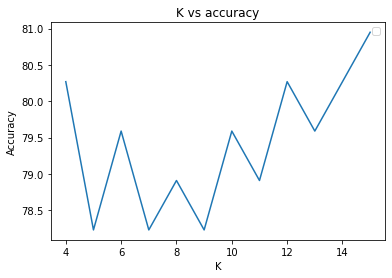

In [9]:
iteration = [*range(4,16, 1)] 
plt.title('K vs accuracy')
print(iteration)
print(accu)
plt.plot(iteration, accu)
plt.legend()
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [10]:

import seaborn as sebrn

def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
            TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FP += 1
        if y_actual[i]==y_hat[i]==0:
            TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FN += 1

    return(TP,TN,FP, FN)

def precision_fn(tp, fp):
   
    return (tp  * 100)/ float( tp + fp)

def recall_fn(tp, fn):
    
    return (tp  * 100)/ float( tp + fn)

def f1_score_fn(precision, recall):
    # calculates the F1 score
    f1_score = (2*precision*recall)/ (precision + recall)
 
    return f1_score

def plot_confusion_matrix(cm):
    fx = sebrn.heatmap(cm, annot=True, cmap='turbo')
    fx.set_title(' Confusion Matrix \n\n');
    fx.set_xlabel('\nValues model predicted')
    fx.set_ylabel('True Values ');

for K=  4  accuracy=  85.33
precision 80.76923076923077
recall 92.3076923076923
f1_score 86.15384615384615
              precision    recall  f1-score   support

           0       0.91      0.78      0.84        93
           1       0.81      0.92      0.86        91

    accuracy                           0.85       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184



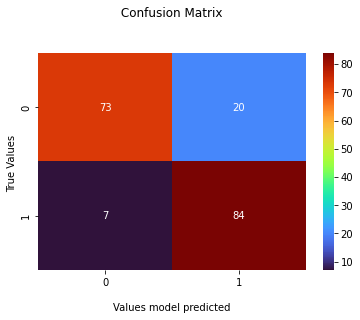

In [11]:

#prediction and finding accuracy for test set for different value of k
k=4
output=output_predict(X_train,Y_train,X_test,4)
ac=getAccuracy(Y_test,output)
tp, tn, fp, fn= perf_measure(Y_test,output)

precision=precision_fn(tp, fp)
recall= recall_fn(tp, fn)
f1_score=f1_score_fn(precision,recall)
conf_matrix = confusion_matrix(Y_test,output)

print("for K= ",k, " accuracy= ",ac)
print("precision",precision)
print("recall",recall)
print("f1_score",f1_score)
print(classification_report(Y_test,output))
plot_confusion_matrix(conf_matrix)

for K=  7  accuracy=  85.33
precision 80.18867924528301
recall 93.4065934065934
f1_score 86.29441624365481
              precision    recall  f1-score   support

           0       0.92      0.77      0.84        93
           1       0.80      0.93      0.86        91

    accuracy                           0.85       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184



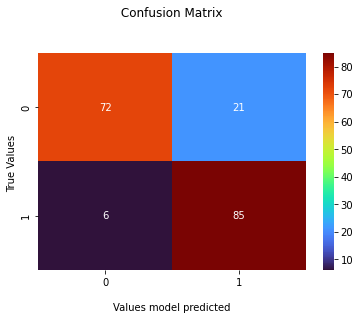

In [12]:

#prediction and finding accuracy for test set for different value of k
k=7
output= output_predict(X_train,Y_train,X_test,k)
ac=getAccuracy(Y_test,output)
tp, tn, fp, fn= perf_measure(Y_test,output)

precision=precision_fn(tp, fp)
recall= recall_fn(tp, fn)
f1_score=f1_score_fn(precision,recall)
conf_matrix = confusion_matrix(Y_test,output)

print("for K= ",k, " accuracy= ",ac)
print("precision",precision)
print("recall",recall)
print("f1_score",f1_score)
print(classification_report(Y_test,output))
plot_confusion_matrix(conf_matrix)

for K=  9  accuracy=  85.33
precision 80.18867924528301
recall 93.4065934065934
f1_score 86.29441624365481
              precision    recall  f1-score   support

           0       0.92      0.77      0.84        93
           1       0.80      0.93      0.86        91

    accuracy                           0.85       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184



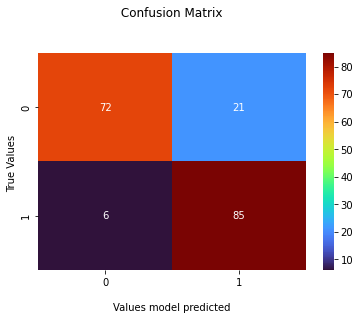

In [13]:

#prediction and finding accuracy for test set for different value of k
k=9
output= output_predict(X_train,Y_train,X_test,k)
ac=getAccuracy(Y_test,output)
tp, tn, fp, fn= perf_measure(Y_test,output)

precision=precision_fn(tp, fp)
recall= recall_fn(tp, fn)
f1_score=f1_score_fn(precision,recall)
conf_matrix = confusion_matrix(Y_test,output)

print("for K= ",k, " accuracy= ",ac)
print("precision",precision)
print("recall",recall)
print("f1_score",f1_score)
print(classification_report(Y_test,output))
plot_confusion_matrix(conf_matrix)

for K=  11  accuracy=  86.41
precision 82.3529411764706
recall 92.3076923076923
f1_score 87.04663212435234
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        93
           1       0.82      0.92      0.87        91

    accuracy                           0.86       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



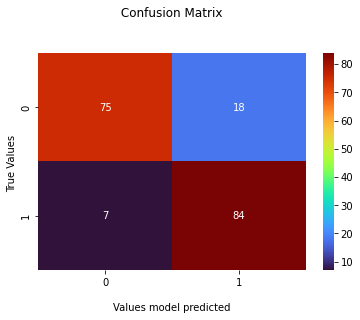

In [14]:
k=11
output= output_predict(X_train,Y_train,X_test,k)
ac=getAccuracyCategorical(Y_test,output)
tp, tn, fp, fn= perf_measure(Y_test,output)

precision=precision_fn(tp, fp)
recall= recall_fn(tp, fn)
f1_score=f1_score_fn(precision,recall)
conf_matrix = confusion_matrix(Y_test,output)

print("for K= ",k, " accuracy= ",ac)
print("precision",precision)
print("recall",recall)
print("f1_score",f1_score)
print(classification_report(Y_test,output))
plot_confusion_matrix(conf_matrix)